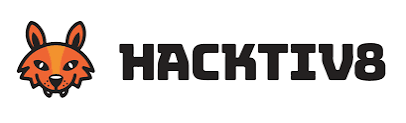

--------

# Assignment 1

Tugas ini menggunakan dataset "London Crime Data, 2008 - 2016" yang diperoleh melalui kaggle (https://www.kaggle.com/datasets/jboysen/london-crime).

## Step 1: Import Library

Pertama import semua library yang dibutuhkan dalam proses preprocessing dan visualisasi data seperti berikut:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

plt.style.use('ggplot')

## Step 2: Load Dataset

Selanjutnya, load dataset yang akan digunakan dengan menggunakan library pandas.

In [2]:
data = pd.read_csv('dataset/london_crime_by_lsoa.csv')

## Step 3: Exploring Dataset

Sekarang kita periksa lima data pertama, lima data terakhir, ukuran, tipe data dari masing-masing kolom, dan missing values dari dataset.

In [3]:
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
data.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
data.shape

(13490604, 7)

Didapat bahwa dataset memiliki 13.490.604 data dengan variabel sebanyak 7.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Diperoleh bahwa kolom lsoa_code, borough, major_category, dan minor_category merupakan string. Sementara kolom value, year, dan month merupakan integer.

In [7]:
data.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [8]:
# melihat apa terdapat missing values
data.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Dari hasil di atas, diperoleh bahwa dataset tidak mengandung missing values.

In [10]:
# ubah nama kolom menjadi string
data.columns = list(map(str, data.columns))

In [11]:
data

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


## Step 4: Visualisasi Data

### A. Area Plot

Tentukan 5 wilayah yang paling banyak terjadi kriminalitas?

In [49]:
# membuat group
data_group = data.groupby(['borough', 'year'])[['value']].sum()
data_group

value
borough              year       
Barking and Dagenham 2008  17656
                     2009  17713
                     2010  17130
                     2011  16686
                     2012  15990
...                          ...
Westminster          2012  59226
                     2013  53852
                     2014  47564
                     2015  47395
                     2016  48330

[297 rows x 1 columns]

In [50]:
# mengubah nama kolom value jadi total
data_group.rename(columns={"value":"total"}, inplace=True)

In [52]:
# mengreset index menjadi awal
data_group.reset_index(inplace=True)

In [53]:
data_group

,borough,year,total
0,Barking and Dagenham,2008,17656
1,Barking and Dagenham,2009,17713
2,Barking and Dagenham,2010,17130
3,Barking and Dagenham,2011,16686
4,Barking and Dagenham,2012,15990
...,...,...,...
292,Westminster,2012,59226
293,Westminster,2013,53852
294,Westminster,2014,47564
295,Westminster,2015,47395


In [54]:
# membuat list wilayah
boroughs = list(data_group["borough"].unique())
boroughs

['Barking and Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'City of London',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster']

In [55]:
# membuat list tahun
years = list(data_group["year"].unique())
years

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [56]:
# inisiasi dataframe kosong dari kolom tahun dan index wilayah
data_boryear = pd.DataFrame(None, columns=years, index=boroughs)
data_boryear.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016
Barking and Dagenham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bexley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bromley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# mengisi data pada dataframe 
for borough in boroughs:
    for year in years:
        data_boryear.at[borough, year] = int(data_group.loc[
            (data_group["borough"] == borough)
            & (data_group["year"] == year), "total"
        ])
        
# membuat kolom total 
data_boryear["total"] = data_boryear.sum(axis=1)

# mengurutkan data berdasarkan kolom total 
data_boryear.sort_values(["total"], ascending=False, inplace=True)

# mengambil 5 data teratas
data_top = data_boryear.head()
data_top

,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,1365084.0
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,876534.0
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,836427.0
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,825441.0
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,786072.0


In [65]:
# menghapus kolom total
del data_top["total"]

In [67]:
# mengtranspose data top 5
data_top5 = data_top.transpose()
data_top5

,Westminster,Lambeth,Southwark,Camden,Newham
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


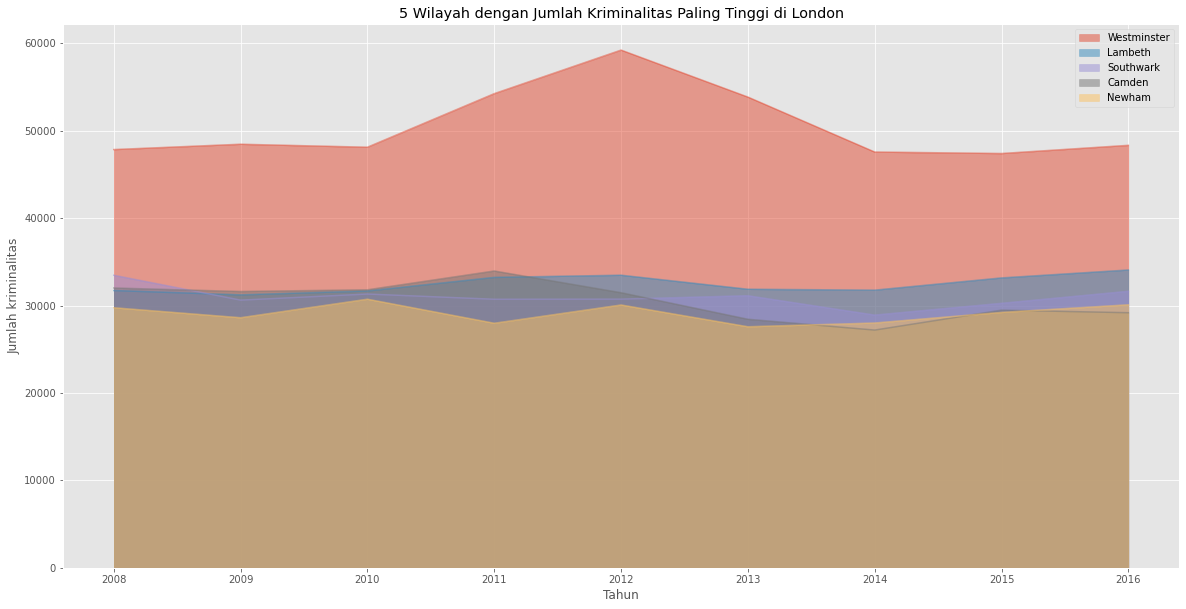

In [68]:
# membuat visualisasi 
data_top5.index = data_top5.index.map(int)

data_top5.plot(kind='area',
            stacked=False,
            figsize=(20, 10),
            )

plt.title('5 Wilayah dengan Jumlah Kriminalitas Paling Tinggi di London')
plt.ylabel('Jumlah kriminalitas')
plt.xlabel('Tahun')

plt.show()

#### Interpretasi:

Berdasarkan plot di atas, dapat disumpulkan bahwa ada 5 wilayah yang memiliki jumlah kriminalitas paling tinggi di London sepanjang tahun 2008 - 2016 yaitu Westminster, Lambeth, Southwark, Camden, dan Newham. Westminster merupakan wilayah yang terdapat kriminalitas paling tinggi, dan tahun 2012 sebagai puncak kriminalitas dengan 59,226 ribu.

### B. Histogram
Apa jenis kriminalitas yang sering terjadi di Lambeth?

In [74]:
# menggabungkan bulan dan tahun ke dalam format penanggalan
data['date'] = pd.to_datetime(data[['year', 'month']].assign(DAY=1)) 
data

,lsoa_code,borough,major_category,minor_category,value,year,month,date
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2016-11-01
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2016-11-01
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2015-05-01
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,2016-03-01
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,2008-06-01
...,...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2,2015-02-01
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6,2015-06-01
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2,2011-02-01
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5,2011-05-01


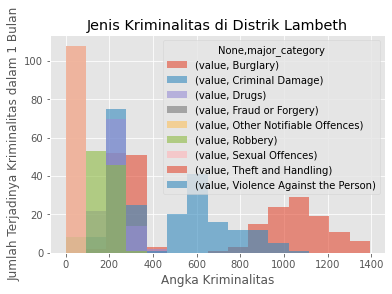

In [75]:
data.loc[data['borough'].isin(['Lambeth'])].groupby(['date','major_category']).agg({'value':'sum'}).unstack('major_category').plot(kind='hist',bins=15,alpha=0.6,)

plt.title('Jenis Kriminalitas di Distrik Lambeth') 
plt.ylabel('Jumlah Terjadinya Kriminalitas dalam 1 Bulan') 
plt.xlabel('Angka Kriminalitas') 

plt.show()

#### Interpretasi:
Berdasarkan histogram di atas, dapat disimpulkan bahwa jenis kriminalitas yang paling sering terjadi dalam 1 bulan di Lambeth adalah Sexual Offences.

### C. Bar Chart
Pada tahun berapa Camden memiliki angka kriminalitas yang tinggi?

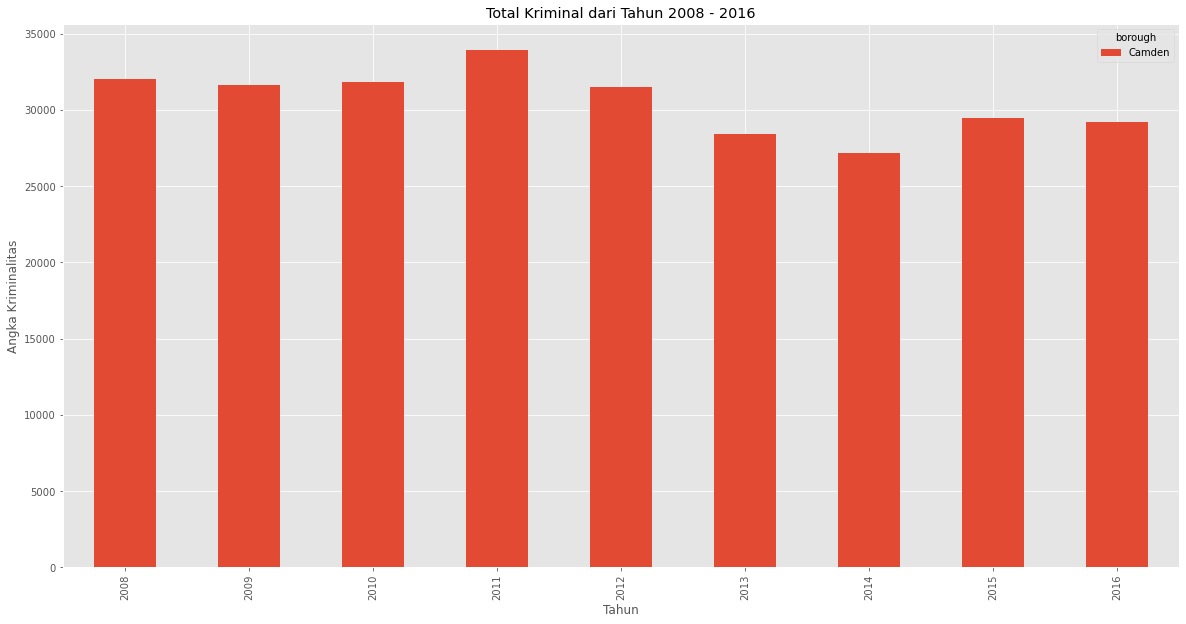

In [76]:
data.loc[data['borough'].isin(['Camden'])].groupby(['year','borough']).sum()['value'].reset_index().pivot(index = 'year', columns='borough', values='value').plot(kind='bar',figsize=(20,10))

plt.title('Total Kriminal dari Tahun 2008 - 2016') 
plt.ylabel('Angka Kriminalitas') 
plt.xlabel('Tahun') 

plt.show()

#### Interpretasi:
Berdasarkan bar chart di atas, dapat disimpulkan bahwa pada tahun 2011 Camden memiliki angka kriminalitas yang tinggi.

### D. Pie Chart
Berapa presentase kategori kejahatan mayor di London tahun 2008 - 2016?

In [79]:
def create_list_number_crime(name_column, list_unique):
    # list_unique = data[name_column].unique()
    
    i = 0
    
    list_number = list()
    
    while i < len(list_unique):
        list_number.append(len(data.loc[data[name_column] == list_unique[i]]))
        i += 1
    
    return list_unique, list_number

def pie_plot(list_number, list_unique):
    plt.figure(figsize=(20,10))
    plt.pie(list_unique, 
        labels=list_number,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)
 
    plt.axis('equal')
    plt.show()
    return 

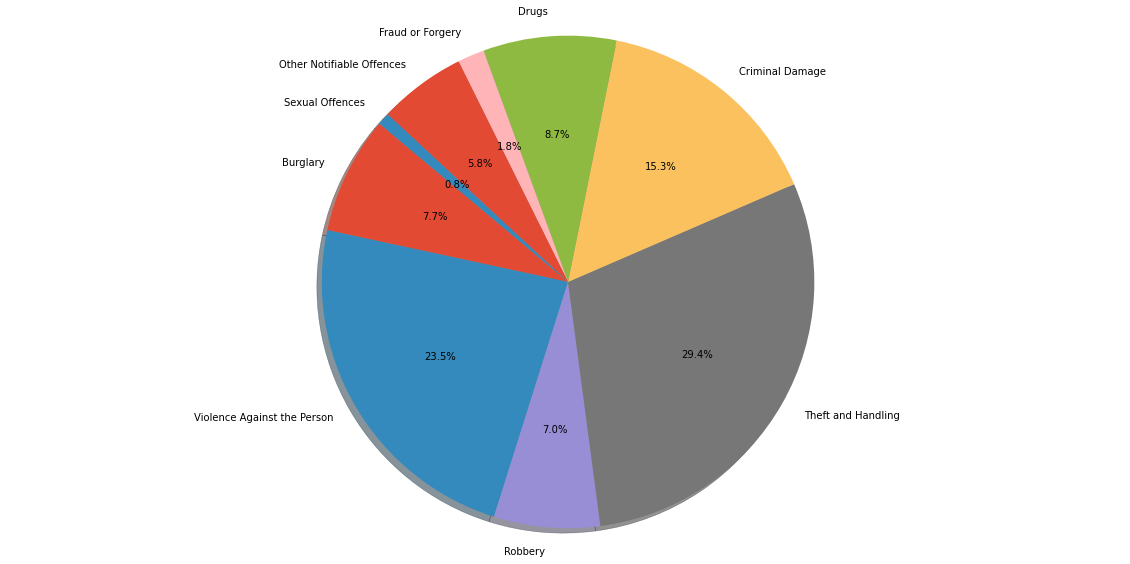

In [80]:
list_unique_major, list_number_major = create_list_number_crime('major_category',data['major_category'].unique())
pie_plot(list_unique_major, list_number_major)

In [81]:
#mengurutkan kategori mayor berdasarkan jumlah value
data_major = data.groupby(['major_category']).sum()

#menghapus kolom yang tidak digunakan
data_major.drop(['year', 'month'], axis=1, inplace=True)

data_major.sort_values(['value'], ascending=False, axis=0, inplace=True)
data_major = data_major
data_major

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765
Robbery,258873
Other Notifiable Offences,106349
Fraud or Forgery,5325
Sexual Offences,1273


Berdasarkan pie chart di atas, dapat disimpulkan bahwa ada 9 kategori kejahatan mayor dengan presentase sebagai berikut:
1. Theft and Handling sebesar 29,4%.
2. Violence Against the Person sebesar 23,5%.
3. Burglary sebesar 7,7%.
4. Criminal Damage sebesar 15,3%.
5. Drugs sebesar 8,7%.
6. Robbery sebesar 7.0%.
7. Other Notifiable Offences sebesar 5,8%.
8. Fraud or Forgery sebesar 1,8%.
9. Sexual Offences sebesar 0,8%.

### E. Blox Plot
Bagaimana distibusi data jumlah kriminal di London tahun 2008 - 2016?

In [93]:
# menghapus kolom yang tidak diperlukan
data_b = ["borough","major_category","minor_category","month"]
data_bp = data.drop(data_b, axis=1)
data_bp = data_bp.groupby("year").sum()
data_bp

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [95]:
# menampilkan ringkasan 
data_bp.describe()

,value
count,9.000000
mean,716417.555556
std,21301.370555
min,680183.000000
25%,711624.000000
50%,717214.000000
75%,736121.000000
max,738641.000000


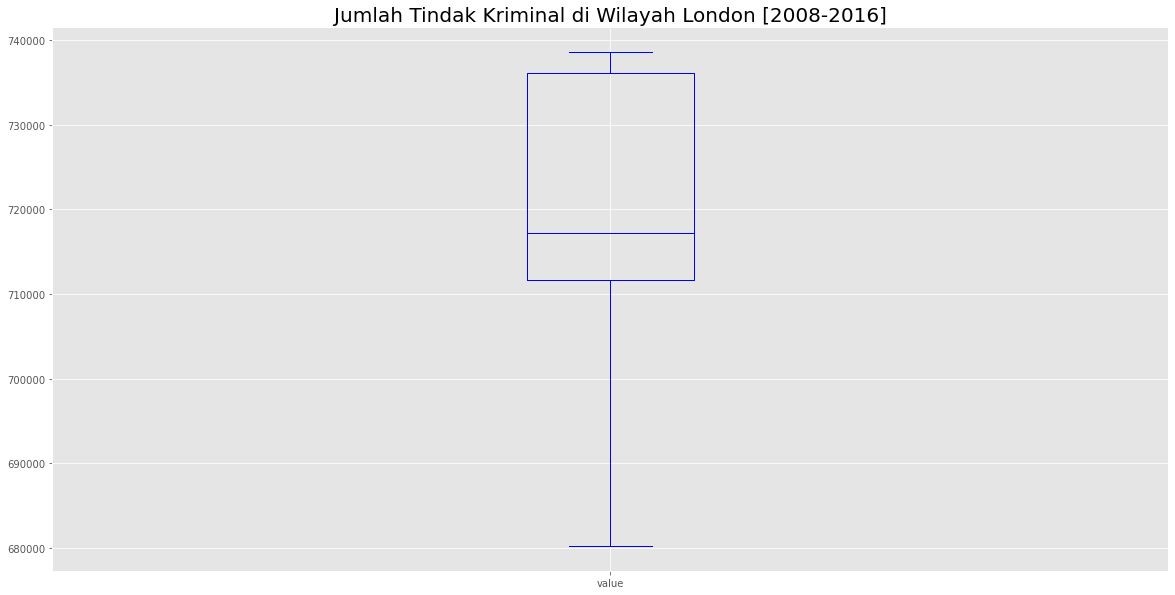

In [96]:
# inisiasi box plot
data_bp.plot(kind="box",
                figsize=(20,10),
                color = "blue"
                )

plt.title("Jumlah Tindak Kriminal di Wilayah London [2008-2016]", fontsize=20)
plt.show()

#### Interpretasi:
Berdasarkan box plot di atas, dapat disimpulkan bahwa:
- Mean = 716417,6
- Minimum = 680,183
- Kuartil Satu = 711,624
- Kuartil Dua = 717,214
- Kuartil Tiga = 736,121
- Maximum = 738,641

### F. Scatter Plot
Bagaimana sebaran data kriminalitas di London pada 5 wilayah yang sering terjadi kejahatan?

In [98]:
#membuat data frame dari top 5 wilayah
data_scatter = data_boryear.loc[['Westminster', 'Lambeth', 'Southwark', 'Camden', 'Newham'], years].transpose()
data_sp = pd.DataFrame(data_scatter.sum(axis=1))
data_sp.reset_index(inplace=True)
data_sp.columns = ['year', 'value']
data_sp['year'] = data_sp['year'].astype(int)
data_sp

,year,value
0,2008,174795.0
1,2009,170526.0
2,2010,173639.0
3,2011,180124.0
4,2012,184975.0
5,2013,172860.0
6,2014,163444.0
7,2015,169513.0
8,2016,173310.0


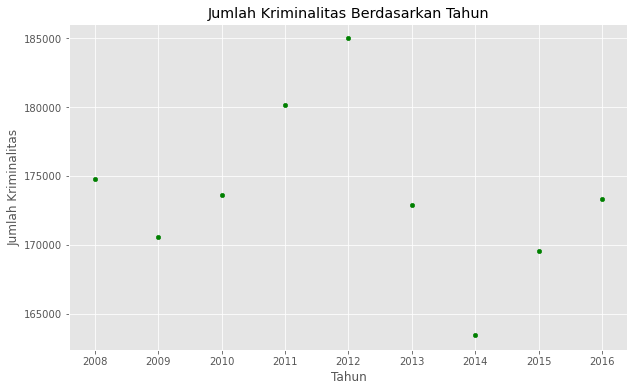

In [99]:
data_sp.plot(kind='scatter', x='year', y='value', figsize=(10, 6), color='green')

plt.title('Jumlah Kriminalitas Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kriminalitas')

plt.show()


#### Interpretasi:
Berdasarkan scatter plot di atas, dapat disimpulkan bahwa kriminalitas mengalami kenaikan pada tahun 2012  dengan 184,975 ribu dan mengalami penurunan dari tahun 2012 sampai 2014 dengan 163,444 ribu. Dan terjadi kenaikan lagi pada tahun 2015 dan 2016.

### G. Word Clouds
Besaran ukuran  kriminal wilayah Camden berdasarkan kategori mayor?

In [113]:
#data word berdasarkan wilayah di camden
data_word = data[data['borough'].isin(['Camden'])]
data_word.drop(['date'], axis=1, inplace=True)
data_word

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2836\836892181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_word.drop(['date'], axis=1, inplace=True)


,lsoa_code,borough,major_category,minor_category,value,year,month
53,E01000869,Camden,Burglary,Burglary in Other Buildings,0,2013,3
58,E01000893,Camden,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2012,9
135,E01000936,Camden,Robbery,Personal Property,1,2011,11
162,E01000893,Camden,Theft and Handling,Motor Vehicle Interference & Tampering,0,2013,6
267,E01000912,Camden,Robbery,Business Property,0,2013,1
...,...,...,...,...,...,...,...
13490250,E01000857,Camden,Violence Against the Person,Offensive Weapon,0,2011,12
13490359,E01000842,Camden,Burglary,Burglary in a Dwelling,1,2011,2
13490412,E01000950,Camden,Robbery,Personal Property,1,2016,3
13490461,E01000909,Camden,Other Notifiable Offences,Going Equipped,0,2013,1


In [115]:
data_word = data_word['major_category'].str.cat(sep= ' ')

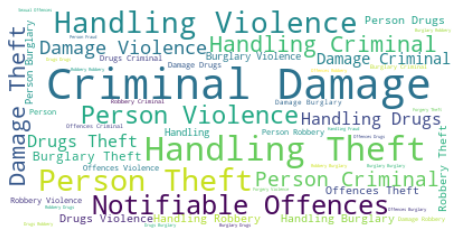

In [116]:
stopwords = set(STOPWORDS)

data_wordcloud = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)

data_wordcloud.generate(data_word)

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(12)

plt.imshow(data_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Interpretasi:
Dari hasil word clouds di atas itu merukan kata-kata yang berasal dari data wilayah Camden berdasarkan kategori mayor.

### H. Follium Maps

In [117]:
# map kota london
latitude = 51.509865
longitude = -0.118092

london_map = folium.Map(location=[latitude,longitude], zoom_start=12)
london_map


## Kesimpulan:
Berdasarkan hasil visualisasi data yang telah dibuat diketahui bahwa 
1. London memiliki jumlah kriminalitas paling tinggi sepanjang tahun 2008 - 2016 yaitu Westminster, Lambeth, Southwark, Camden, dan Newham. 
2. Westminster merupakan wilayah yang terdapat kriminalitas paling tinggi, dan tahun 2012 sebagai puncak kriminalitas dengan 59,226 ribu.
3. Jenis kriminalitas yang paling sering terjadi dalam 1 bulan di Lambeth adalah Sexual Offences.
4. Pada tahun 2011 Camden memiliki angka kriminalitas yang tinggi.